# Research on car sales ads

As analysts at Crankshaft List where hundreds of free advertisements for vehicles are published on our site every day, we have studied the data collected over the last few years in order to determine which factors influence the price of a vehicle. In this project, we will follow the methodology as following:
- Open the data file and study the general information.
- Data preprocessing including handling missing values and converting data to required types.
- Add calculations and necessary columns as required for the analysis.
- Carry exploratory data analysis following the project instruction.
- Final conclusion.

## Open the data file and study the general information. 

In [1]:
#Libraries and project environment setup:

##Pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np

##Matplotlib for visualization
import matplotlib.pyplot as plt

##Remove warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore");

In [2]:
#csv file read
##We use try-except to handle unexpected errors
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except: 
    df = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [3]:
#New addition- to guarantee efficiency we immediately dropping row-based duplicates in the begining
df.drop_duplicates(inplace=True,keep='first')
df.reset_index(drop=True, inplace=True)

In [4]:
#General file examination
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


- Results show column names are accurate to the project data description.
- Dataset includes 51525 entries and 13 columns.
- **Price** column is the target variable and the other 12 columns are features.
- 9 columns are categorical, 3 are quantical and **is_4wd** contains quantical labels rather than quantical values.
- There are 3 data types: 4 floats, 7 objects and 2 integers. Floats should be changed to integers.
- **Date_posted** column should be converted to a date_time format.
- Values are missing in **model_year, cylinders, odometer, paint_color** columns, while in the **is_4wd** column almost a half is missing.

In [5]:
#Integrated display of the columns
df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


- The minimum **price** value is **1**, which is too low for a vehicle.
- In the **price** column the mean is higher than the median value suggesting that the distribution has a long tail of large values.
- **Is_4wd** column only contains one value **'1.0'**, meaning this is a boolean, where '1' is 'True' and '0' is 'False'. Therefore all the missing values in **is_4wd** should be replaced with '0'
- Minimum **model_year** is **1908**, seems quite old and will need further investigating to see if this is an error.

### Conclusion

In this first phase we opened the data file and studied the dataset' general information. Now we are ready to begin the data processing.

## Data preprocessing

In this second phase we start by identifying the missing data and evaluate their impact on the dataset data reliability in order to decide whether to fill in or drop these entries.
Additionally, we'll find errors and correct them.
Next, replace the data type of all floats to integers in order to make further processing easier.
Then, drop duplicated entries.

We already determined there are missing values, dealing with them includes the following procedure:
- We determine how significant are the missing values, if below 5-10% we drop them.
- We determine if missing values belong to categorical or quantitative variables, and handle them accordingly.

In [6]:
#Before we start, we look at the percentage of missing values in all the columns
df.isna().sum()*100/len(df)
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')
df.isna().mean() * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

A rule of thumb is that we don't drop more than 5%-10% of the data.
Percentages of missing values in **cylinders, odometer, paint_color** and **is_4wd** columns are all over 10%, therefore must be filled in.
In **model_year** column 7% is missing, yet we choose to fill in these values as well as not to lose any valuable data.

In [7]:
#We fill in missing **odometer** values with median of groups based on price and 
#condition- the lower the price and worse the condition the higher the odometer values, 
#given the vehicle drove more.
df['odometer'] = df['odometer'] = df.groupby(['price', 'condition'])['odometer'].apply(lambda x: x.fillna(x.median()))
df['odometer'].isna().sum()/51525*100

0.7704997573993208

In [8]:
#We see there is less than 1% of missing data that doesn't have a median to be filled in 
#with and since it's only 1%, we drop it
df = df.dropna(subset=['odometer'])
df.reset_index(drop=True, inplace=True)

In [9]:
#We assume cars of the same model and odometer values have been manufactured and driven for 
#the same time.
##We fill missing **model_year** values with the median value of groups based on model and odometer
df['model_year'] = df.groupby(['model', 'odometer'])['model_year'].apply(lambda x: x.fillna(x.median()))
df['model_year'].isna().sum()/51525*100

3.4274623968947115

In [10]:
#We see there is less than 4% of missing data that doesn't have a median to be filled in 
#with and since it's less than 5%, we drop it
df = df.dropna(subset=['model_year'])
df.reset_index(drop=True, inplace=True)

In [11]:
#We assume cars of the same model have the same number of cylinders since their engines 
#were designed for the same purposes.
##We fill missing **cylinders** values with the median value of every model group
df['cylinders'] = df.groupby(['model'])['cylinders'].apply(lambda x: x.fillna(x.median()))

In [12]:
#Since color is completely random and can't be grouped we fill in missing values with the 
#word 'missing'
df['paint_color'] = df['paint_color'].fillna('other')

In [13]:
#We only have 1 and NaN values, changed NaN to **0** as in 1=true 0=false
df['is_4wd'] = df['is_4wd'].fillna(0)

In [14]:
#Printing sum of missing values per column to verify that they were all dropped/filled
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

As we see above, there are no more missing values. Now we move on to fixing errors in the dataset.

In [15]:
#Print value counts to get a general look at the column
df['price'].value_counts()

1        795
6995     703
5995     638
4995     610
3500     598
        ... 
8343       1
14484      1
36993      1
16475      1
3790       1
Name: price, Length: 3133, dtype: int64

In [16]:
#Any price under 1000$ is unlikely, therefore we'll consider dropping these values
#We check the percentage of these values in order to measure their impact
sum(df['price'] < 1000)/len(df)*100

2.765285037073052

In [17]:
#If the car is highly priced it may be for reasons not specified in any column such as 
#collector's item/upgrades/scams and so we leave the max of 375000$ untouched
#We choose not to drop these values since it's better to drop ~2.7% of data than to 
#replace with inaccurate median values when **price** column is the main focus
#Then we reset index
df.drop(df[df['price'] < 1000].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df['price'].value_counts()

6995     703
5995     638
4995     610
3500     598
7995     597
        ... 
10754      1
1550       1
3575       1
5588       1
19680      1
Name: price, Length: 3027, dtype: int64

In [18]:
#Print value counts to get a general look at the column
df['model_year'].value_counts()

2013.0    3634
2012.0    3537
2011.0    3440
2014.0    3440
2015.0    3320
          ... 
1997.5       1
1954.0       1
1999.5       1
1998.5       1
1986.5       1
Name: model_year, Length: 92, dtype: int64

In [19]:
#We leave the outliers since they might make sense for collector's items or spare parts 
#The min year is 1908 which as said may make sense, the max is 2019 which seems ok
#To be on the safe side we'll turn this column into integer type later on (all columns together)

In [20]:
#Print value counts to get a general look at the column
df['model'].value_counts()

ford f-150                           2626
chevrolet silverado 1500             2059
ram 1500                             1634
chevrolet silverado                  1207
ram 2500                             1028
                                     ... 
chrysler 200                          225
ford f-250 super duty                 223
dodge dakota                          219
nissan murano                         214
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [21]:
#We see various models, assuming they exist, 
#all that is left to do is to make this column all lower case to avoid duplicates and 
#be on the safe side
df['model']=df['model'].str.lower()

In [22]:
#Print value counts to get a general look at the column
df['condition'].value_counts()

excellent    22827
good         19226
like new      4394
fair          1356
new            119
salvage         75
Name: condition, dtype: int64

In [23]:
#Seems good

In [24]:
#Print value counts to get a general look at the column
df['cylinders'].value_counts()

8.0     16741
6.0     16350
4.0     14354
5.0       273
10.0      246
3.0        31
12.0        2
Name: cylinders, dtype: int64

In [25]:
#After some googling, all good!

In [26]:
#Print value counts to get a general look at the column
df['fuel'].value_counts()

gas         43984
diesel       3532
hybrid        376
other         100
electric        5
Name: fuel, dtype: int64

In [27]:
#Other is suspicious, but giving benefit of the doubt, it might be due to people not being 
#certain of their car's fuel type, we choose to leave it

In [28]:
#Print value counts to get a general look at the column
df['odometer'].value_counts()

170000.0    272
120000.0    206
140000.0    202
130000.0    194
0.0         179
           ... 
161850.0      1
150103.0      1
12300.0       1
62196.0       1
269527.0      1
Name: odometer, Length: 17039, dtype: int64

In [29]:
#All number may be true, 0 is tricky, but it may be due to brand new car, reset or tampering 

In [30]:
#Print value counts to get a general look at the column
df['transmission'].value_counts()

automatic    43885
manual        2619
other         1493
Name: transmission, dtype: int64

In [31]:
#Other is suspicious, but giving benefit of the doubt,
#it might be due to people not being certain of their car's transmission type,
#we choose to leave it

In [32]:
#Print value counts to get a general look at the column
df['type'].value_counts()

truck          11540
SUV            11474
sedan          11190
pickup          6679
coupe           2138
wagon           1454
mini-van        1093
hatchback        962
van              583
convertible      417
other            238
offroad          205
bus               24
Name: type, dtype: int64

In [33]:
#Once again, other is suspicious, but giving benefit of the doubt,
#it might be due to people not being certain of their car's type,
#we choose to leave it

In [34]:
#Print value counts to get a general look at the column
df['paint_color'].value_counts()

white     9410
other     8597
black     7136
silver    5834
grey      4715
blue      4164
red       4141
green     1287
brown     1141
custom    1026
yellow     241
orange     209
purple      96
Name: paint_color, dtype: int64

In [35]:
#All good, as we recall **other** is of our data manipulation

In [36]:
#Print value counts to get a general look at the column
df['is_4wd'].value_counts()

0.0    24306
1.0    23691
Name: is_4wd, dtype: int64

In [37]:
#Great! All values 1/0, as in true/false

In [38]:
#Print value counts to get a general look at the column
df['date_posted'].value_counts()

2019-03-17    174
2018-10-09    169
2019-01-05    168
2018-07-29    163
2019-04-10    162
             ... 
2018-05-01    112
2018-07-18    109
2018-06-18    107
2019-01-11    106
2019-01-04    105
Name: date_posted, Length: 354, dtype: int64

In [39]:
#At first look seems ok, to be on the safe side, we covert dates to same format using datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [40]:
#We want to make sure all dates posted aren't in the future, which is impossible
print(df.query('date_posted>=2021'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


In [41]:
#No dates are in 2021 or in afterwards, we now check the past to be sure it's not just an error in code
print(df.query('date_posted<2021'))

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500      2014.0      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas  182000.0   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
47992   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
47993   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
47994   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
47995   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
47996   6300      2014.0   nissan altima       good        4.0  gas  154000.0   

      transmission    type 

In [42]:
#All good

In [43]:
#Print value counts to get a general look at the column
df['days_listed'].value_counts()

18     891
19     886
24     876
22     876
20     864
      ... 
244      1
188      1
252      1
261      1
223      1
Name: days_listed, Length: 223, dtype: int64

In [44]:
#Min value is 0 assuming it means post is less than full day old/regret about 
#selling/system error/quick sale, we leave it to be on the safe side
#Max seems alright
#We see some low numbers of days probably meaning the table isn't up to date with 
#today - and that's ok

In [45]:
#Now we check data types in order to change them if necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47997 entries, 0 to 47996
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47997 non-null  int64         
 1   model_year    47997 non-null  float64       
 2   model         47997 non-null  object        
 3   condition     47997 non-null  object        
 4   cylinders     47997 non-null  float64       
 5   fuel          47997 non-null  object        
 6   odometer      47997 non-null  float64       
 7   transmission  47997 non-null  object        
 8   type          47997 non-null  object        
 9   paint_color   47997 non-null  object        
 10  is_4wd        47997 non-null  float64       
 11  date_posted   47997 non-null  datetime64[ns]
 12  days_listed   47997 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 4.8+ MB


In [46]:
#Based on info function results above, we can tell 4 columns are in float form, 6 object, 
#2 integer, 1 datetime (changed above)
#Model_year, cylinders, odometer and is_4wd(boolean), logically should be integers.
#As such we convert these floats to integers. 
#We use the astype function as method to change the data type.
df[['model_year','cylinders', 'odometer', 'is_4wd']] = df[['model_year','cylinders', 'odometer', 'is_4wd']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47997 entries, 0 to 47996
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47997 non-null  int64         
 1   model_year    47997 non-null  int64         
 2   model         47997 non-null  object        
 3   condition     47997 non-null  object        
 4   cylinders     47997 non-null  int64         
 5   fuel          47997 non-null  object        
 6   odometer      47997 non-null  int64         
 7   transmission  47997 non-null  object        
 8   type          47997 non-null  object        
 9   paint_color   47997 non-null  object        
 10  is_4wd        47997 non-null  int64         
 11  date_posted   47997 non-null  datetime64[ns]
 12  days_listed   47997 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 4.8+ MB


Well done! All data types are correct. We can move on.

In [47]:
#After fixing the data for further analysis in previous phases,
#here we check for duplicate enteries in the dataset.
#We'll remove duplicates only if the entire data entery is the same. Since there is no car number/seller ID, we assume if all columns are alike then it is a definite duplicate.
#We assume that the possible reasons for the appearance of duplicates in the data are human error and technical malfunction of the site system.
df.duplicated().sum()

0

Wow! Wonderful surprise- no dupicates! Moving on...

In this second phase we start by identifying the missing data and evaluate their impact on the dataset data reliability in order to decide whether to fill in or drop these entries. Additionally, we identified errors and correct them. Next, we replaced the data type of all floats to integers in order to make further processing easier. Then, we dropped duplicated entries.
We choose not to categorize and create a new df since every column impacts the car's price and we wouldn't want to lose any valuable data.

## Make calculations and add them to the table

In [48]:
#Year the ad was placed
df['year'] = pd.DatetimeIndex(df['date_posted']).year
df['year'].value_counts()

2018    33226
2019    14771
Name: year, dtype: int64

In [49]:
#Great!

In [50]:
#Month the ad was placed
df['month'] = pd.DatetimeIndex(df['date_posted']).month
df['month'].value_counts()

10    4315
12    4251
3     4235
5     4180
7     4175
1     4171
8     4164
9     4144
11    4072
6     3925
2     3735
4     2630
Name: month, dtype: int64

In [51]:
#Done!

In [52]:
#Day the ad was placed
df['day'] = pd.DatetimeIndex(df['date_posted']).day_name()
df['day'].value_counts()

Thursday     6990
Saturday     6870
Sunday       6845
Friday       6835
Monday       6829
Wednesday    6817
Tuesday      6811
Name: day, dtype: int64

In [53]:
#Excellent!

In [54]:
#Age in years when the ad was placed
df['vehicle_age'] = df['year'] - df['model_year']
df['vehicle_age'].value_counts()

5     3579
7     3532
6     3530
4     3459
3     3128
      ... 
65       1
43       1
69       1
71       1
63       1
Name: vehicle_age, Length: 69, dtype: int64

In [55]:
df.vehicle_age.describe()

count    47997.000000
mean         8.630602
std          6.224601
min         -1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

In [56]:
#Min value is negative therefore we assume it's a mistake and convert it to it's abs value
df['vehicle_age']=df['vehicle_age'].abs()
df.vehicle_age.describe()

count    47997.000000
mean         8.630727
std          6.224428
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

In [57]:
#Age column has a couple of outliers - as mentioned before probably older vehicles..

In [58]:
#Average mileage per year
df['avg_miles_per_year'] = df['odometer']/df['vehicle_age']
df['avg_miles_per_year'].value_counts()

inf             1818
0.000000e+00     177
1.500000e+04     144
1.400000e+04     136
1.300000e+04     135
                ... 
9.744062e+03       1
1.318788e+04       1
8.220250e+03       1
1.110452e+04       1
1.989750e+03       1
Name: avg_miles_per_year, Length: 23565, dtype: int64

In [59]:
#Numbers aren't pretty, so in order to round the numbers we use lambda
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df['avg_miles_per_year'].value_counts()

inf      1818
0         177
15000     144
14000     136
13000     135
         ... 
9744        1
13188       1
8220        1
11105       1
1990        1
Name: avg_miles_per_year, Length: 23565, dtype: int64

In [60]:
df.avg_miles_per_year.describe()

count   47995
mean      inf
std       NaN
min         0
25%     10706
50%     15273
75%     22500
max       inf
Name: avg_miles_per_year, dtype: float64

In [61]:
#Inf is unmeasurable so we replace these values with 'NaN' and then fill in these values 
#with the median of grouped columns odometer and model_year
df['avg_miles_per_year'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['avg_miles_per_year'] = df.groupby(['odometer', 'model_year'])['avg_miles_per_year'].apply(lambda x: x.fillna(x.median()))
df.avg_miles_per_year.describe()

count    46647
mean     18107
std      13687
min          0
25%      10568
50%      14976
75%      21478
max     279365
Name: avg_miles_per_year, dtype: float64

In [62]:
#We get an error due to NaN/inf values when trying to change type to int - since we got 
#rid of inf it must be missing values
#so we calculate the percentage of missing values- if les than 5% we drop
df['avg_miles_per_year'].isna().sum()/len(df)*100

2.8126757922370147

In [63]:
#Given it is ~3% of missing values - we now drop them
df=df.dropna(subset=['avg_miles_per_year'], axis=0)
df.reset_index(drop=True, inplace=True)

In [64]:
#Let's try again
#We convert average miles per year column to int
df[['avg_miles_per_year']]=df[['avg_miles_per_year']].astype(int)

In [65]:
#Getting a better look with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46647 entries, 0 to 46646
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               46647 non-null  int64         
 1   model_year          46647 non-null  int64         
 2   model               46647 non-null  object        
 3   condition           46647 non-null  object        
 4   cylinders           46647 non-null  int64         
 5   fuel                46647 non-null  object        
 6   odometer            46647 non-null  int64         
 7   transmission        46647 non-null  object        
 8   type                46647 non-null  object        
 9   paint_color         46647 non-null  object        
 10  is_4wd              46647 non-null  int64         
 11  date_posted         46647 non-null  datetime64[ns]
 12  days_listed         46647 non-null  int64         
 13  year                46647 non-null  int64     

In [66]:
#Looking much better!

In [67]:
#In the condition column, we now replace string values with a numeric scale
df['condition'] = df['condition'].replace(to_replace=('new', 'like new', 'excellent', 'good', 'fair', 'salvage'), value=(5, 4, 3, 2, 1, 0))
df['condition'].value_counts()

3    22233
2    18880
4     4046
1     1356
0       73
5       59
Name: condition, dtype: int64

OKay.. we finalized phase three, calculated and added new columns to the table, as detailed above per each column. 
All in all, looking good! We move on to the next phase.

## Carry out exploratory data analysis

Studying the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition.
We do this by plotting histograms for each of these parameters.
Then we study how outliers affect the form and readability of the histograms.

In [68]:
#First we take a look at the general description of the price column
df.price.describe()

count    46647
mean     11976
std       9325
min       1000
25%       5381
50%       9000
75%      16000
max     375000
Name: price, dtype: float64

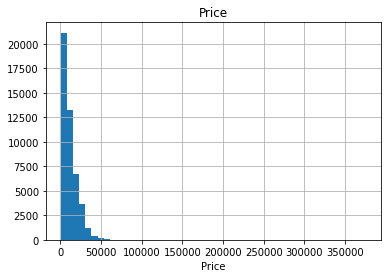

In [69]:
#Plotting histogram for price
df.hist('price', bins=50)
plt.title('Price')
plt.xlabel('Price');

The above histogram depicts the price distribution. 
This kind of distribution is positively skewed since it has a large number of occurrences
in the lower value cells (left side) and few in the upper value cells (right side). 
The large amount of entries in the range of 1000-50,000 is clearly noted.
However, signal entries of larger price values, e.g. 375,000, are not clearly seen.
At first, we thought it's a problem in dataframe, yet the histogram resolution, explains it. 

In [70]:
#First we take a look at the general description of the vehicle_age column
df.vehicle_age.describe()

count   46647
mean        9
std         6
min         0
25%         4
50%         8
75%        12
max       110
Name: vehicle_age, dtype: float64

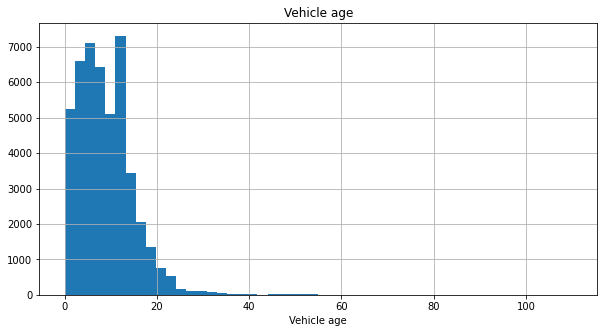

In [71]:
#Plotting histogram for vehicle's age when the ad was placed
df.hist('vehicle_age', bins=50, figsize=(10,5))
plt.title('Vehicle age')
plt.xlabel('Vehicle age');

The above histogram depicts the vehicle_age distribution. 
This kind of distribution is positively skewed since it has a large number of occurrences
in the lower value cells (left side) and few in the upper value cells (right side). 
Mostly, vehicle age is between approx. 0-12 as depicted above.
Outliers 

In [72]:
#First we take a look at the general description of the odometer column
df.odometer.describe()

count    46647
mean    118803
std      60294
min          0
25%      79000
50%     116786
75%     154303
max     990000
Name: odometer, dtype: float64

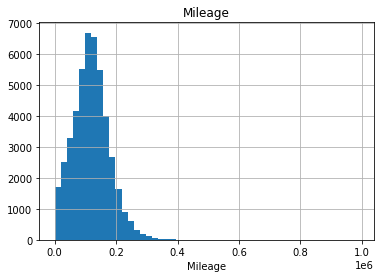

In [73]:
#Plotting histogram for mileage
df.hist('odometer', bins=50)
plt.title('Mileage')
plt.xlabel('Mileage');

The above histogram depicts the mileage distribution. 
This kind of distribution is positively skewed since it has a large number of occurrences
in the lower value cells (left side) and few in the upper value cells (right side). 
The amount of entries in the range of 0-40 is clearly noted.

In [74]:
#First we take a look at the general description of the cylinders column
df.cylinders.describe()

count   46647
mean        6
std         2
min         3
25%         4
50%         6
75%         8
max        12
Name: cylinders, dtype: float64

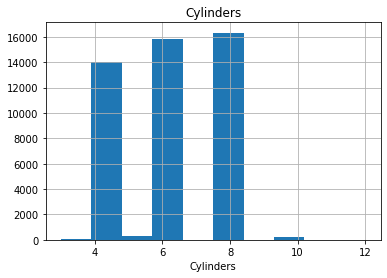

In [75]:
#Plotting histogram for number of cylinders
df.hist('cylinders', bins=10)
plt.title('Cylinders')
plt.xlabel('Cylinders');

The above histogram depicts the cylinders distribution. 
This kind of distribution is normal for number of cylinders, mostly vehicles have an even number anywhere between 4-8, and exceptional vehicles which are a few have more or an odd number of cylinders.

In [76]:
#First we take a look at the general description of the condition column
df.condition.value_counts()

3    22233
2    18880
4     4046
1     1356
0       73
5       59
Name: condition, dtype: int64

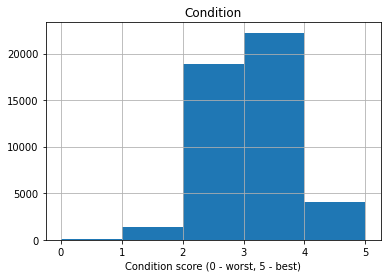

In [77]:
#Plotting histogram for condition
df.hist('condition', bins=5)
plt.title('Condition')
plt.xlabel('Condition score (0 - worst, 5 - best)');

The above histogram depicts the condition distribution. 
This kind of distribution is skewed to the left since it has a large number of occurrences in the upper value cells (right side) and few in the lower value cells (left side), since the majority of vehicles in the dataset are in 'like new' or 'excellent' conditions.

In [78]:
#Creating a for-loop to find the upper limits of outliers from the columns we created histograms for
filter = np.zeros(len(df), dtype=bool) + True
for feature in ['price', 'condition', 'cylinders', 'odometer', 'vehicle_age']:
    Q25 = df[feature].quantile(0.25)
    Q75 = df[feature].quantile(0.75)
    IQR = Q75 - Q25
    #Calculating the cut off and upper limit 
    cut_off = IQR * 1.5
    upper = Q75 + cut_off
    filter[np.where(df[feature]>upper)] = False

In [79]:
#Now we create a new filtered dataframe leaving the outliers in the original one
df_filtered = df[filter]
df_filtered.dropna(how='all', inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

In [80]:
#To check the removal of outliers, we first print the shape of the original dataframe
df.shape

(46647, 18)

In [81]:
#Next, we print the shape of the filtered dataframe.
df_filtered.shape

(43693, 18)

We see fewer entries in the filtered df than in the original one.
Upper limits of outliers successfully removed!

In [82]:
#Moving on to plotting the new filtered histograms and comparing them with the unfiltered ones

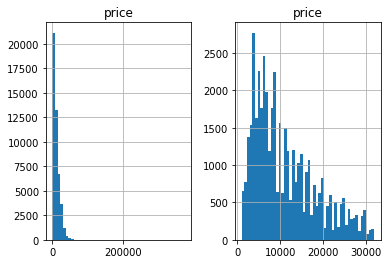

In [83]:
#Here we compare the original with the filltered price histograms
fig, axes = plt.subplots(1, 2)

df.hist('price', bins=50, ax=axes[0])
df_filtered.hist('price', bins=50, ax=axes[1]);

We see above the compared original vs filtered price histograms. Without the outliers it seems like a zoom out of the significant data in the filtered histogram (on the right). 

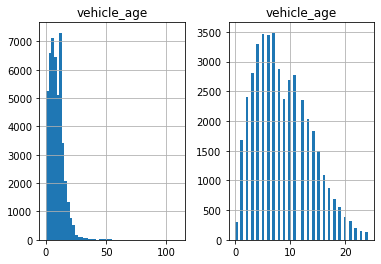

In [84]:
#Here we compare the original with the filltered vehicle_age histograms
fig, axes = plt.subplots(1, 2)

df.hist('vehicle_age', bins=50, ax=axes[0])
df_filtered.hist('vehicle_age', bins=50, ax=axes[1]);

We see above the compared original vs filltered vehicle_age histograms. Without the outliers it seems like a zoom out of the significant data in the filtered histogram (on the right). 

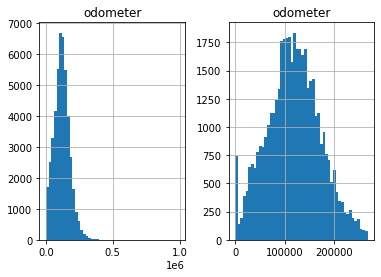

In [85]:
#Here we compare the original with the filtered mileage histograms
fig, axes = plt.subplots(1, 2)

df.hist('odometer', bins=50, ax=axes[0])
df_filtered.hist('odometer', bins=50, ax=axes[1]);

We see above the compared original vs filtered mileage histograms. Without the outliers it seems like a zoom out of the significant data in the filtered histogram (on the right). 

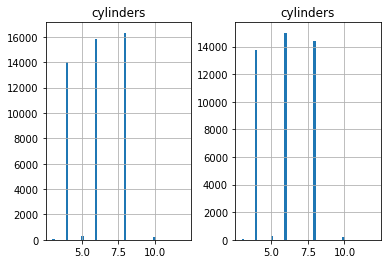

In [86]:
#Here we compare the original with the filltered cylinders histograms
fig, axes = plt.subplots(1, 2)

df.hist('cylinders', bins=50, ax=axes[0])
df_filtered.hist('cylinders', bins=50, ax=axes[1]);

We see above the compared original vs filtered cylinders histograms. Without the outliers it seems like a zoom out of the significant data in the filtered histogram (on the right). In the filtered dataset the 8 cylinders' vehicle amount has notably decreased.

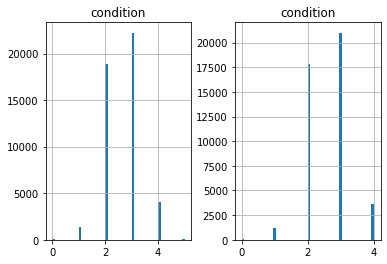

In [87]:
#Here we compare the original with the filtered condition histograms
fig, axes = plt.subplots(1, 2)

df.hist('condition', bins=50, ax=axes[0])
df_filtered.hist('condition', bins=50, ax=axes[1]);

We see above the compared original vs filtered condition histograms. Without the outliers all seems alike with the exception of condition 5 which is an outlier and hence totally removed.

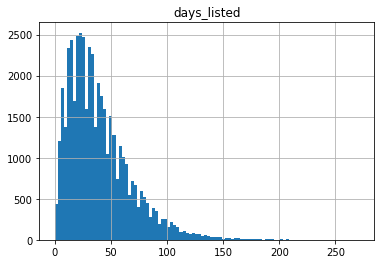

In [88]:
#Plotting days_listed histogram
df.hist('days_listed', bins=100);

In [89]:
#Calculating the mean
'{:0.2f}'.format(df['days_listed'].mean())

'39.60'

In [90]:
#Calculating the median
'{:0.2f}'.format(df['days_listed'].median())

'33.00'

In [91]:
df.days_listed.describe()

count   46647
mean       40
std        28
min         0
25%        19
50%        33
75%        53
max       271
Name: days_listed, dtype: float64

We studied how many days advertisements were displayed (days_listed) by plotting a histogram, and calculating the mean and median. 
The typical lifetime of an ad is anywhere between 19 to 33. 
Now let's determine when ads were removed quickly, as in rows where days_listed=0,
and when they were listed for an abnormally long time hence have not been sold quickly/sold yet.

In [92]:
#Ads removed quickly are displayed in the histogram above as equal to 0 days.
#We now find how many there are.
len(df[df['days_listed'] == 0])

48

In [93]:
#We print these entries in order to see if there is any distinct reason for quick ad removal.
df[df['days_listed'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,day,vehicle_age,avg_miles_per_year
1144,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,1,2018-05-15,0,2018,5,Tuesday,10,9330
1809,14000,1999,ford f250,3,8,diesel,137500,automatic,truck,red,1,2018-09-27,0,2018,9,Thursday,19,7236
2638,4000,2004,ram 1500,3,8,gas,250000,automatic,truck,brown,1,2018-08-13,0,2018,8,Monday,14,17857
3633,16750,1985,chevrolet corvette,4,8,gas,24540,automatic,hatchback,white,0,2018-10-14,0,2018,10,Sunday,33,743
4171,5000,2007,toyota corolla,2,4,gas,223000,manual,sedan,silver,0,2018-07-11,0,2018,7,Wednesday,11,20272
4475,12500,2001,ram 1500,2,8,gas,99892,automatic,truck,black,1,2018-05-11,0,2018,5,Friday,17,5876
5974,4800,2007,honda odyssey,2,6,gas,152400,automatic,mini-van,brown,0,2018-09-25,0,2018,9,Tuesday,11,13854
6422,5900,2007,jeep grand cherokee laredo,3,6,gas,134800,automatic,SUV,grey,1,2018-07-21,0,2018,7,Saturday,11,12254
8723,4999,2012,nissan sentra,3,4,gas,125000,automatic,sedan,silver,0,2019-03-26,0,2019,3,Tuesday,7,17857
8841,15000,2003,ford f-150,2,8,gas,90048,automatic,truck,black,0,2018-09-21,0,2018,9,Friday,15,6003


There are 48 ads listed for 0 days.
We see there is no visible pattern or issue with these entries as previously explained.
And so, we determine ads were removed quickly at 0 days listed and keep these entries as we did in the preprocessing phase.

In [94]:
#To find ads listed for an abnormally long time,
#we create another for-loop to find the upper limits of outliers in the days_listed column
#And then print the value than any number above it is an upper limit outlier
filter = np.zeros(len(df), dtype=bool) + True
for feature in ['days_listed']:
    Q25 = df[feature].quantile(0.25)
    Q75 = df[feature].quantile(0.75)
    IQR = Q75 - Q25
    #Calculating the cut off and upper limit 
    cut_off = IQR * 1.5
    upper = Q75 + cut_off
    filter[np.where(df[feature]>upper)] = False
print(upper)
#Now we create add this column to the filtered dataframe, once again, leaving the outliers in the original one
df_filtered = df[filter]
df_filtered.dropna(how='all', inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

104.0


In [95]:
df.days_listed.describe()

count   46647
mean       40
std        28
min         0
25%        19
50%        33
75%        53
max       271
Name: days_listed, dtype: float64

We determine ads listed for an abnormally long time are ads listed for over 104 days and up to the max of 271 days

In [96]:
#Here we analyze the number of ads and the average price for each type of vehicle by creating a pivot table
type_grouped = df_filtered.pivot_table(index='type', values='price', aggfunc=['count','mean'])
type_grouped

,count,mean
,price,price
type,,
SUV,10803,10993
bus,24,17136
convertible,396,14714
coupe,2005,14518
hatchback,918,6898
mini-van,1029,7873
offroad,194,14288
other,220,10612


The pivot table above shows the number of ads and the average price for each type of vehicle.
Next, we will plot a graph showing the dependence of the number of ads on the vehicle type and select the two types with the greatest number of ads.

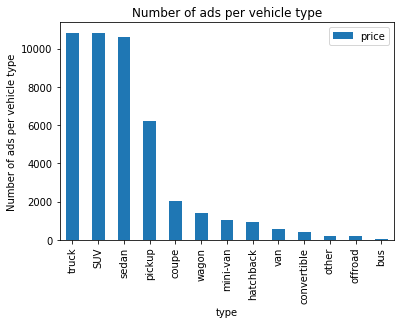

In [97]:
#Plotting a graph showing the dependence of the number of ads on the vehicle type
type_grouped['count'].sort_values(by='price', ascending=False).plot(kind='bar')
plt.title('Number of ads per vehicle type')
plt.ylabel('Number of ads per vehicle type');

Based on the graph above we see the two types with the greatest number of ads are truck (10828) and then SUV (10803). Done!

Now we move on to checking what factors impact price the most.
First we take the 2 most popular vehicle types in the dataset (truck and SUV) and subset our dataframe based on these 2 types.
Then we will verify that the categorical variables (transmission and paint_color) have at least 50 ads, otherwise, their parameters won't be valid for analysis.
All this so we can study whether the price depends on age, mileage, condition, transmission type, and color. 
For categorical variables (transmission type and color), we will plot box-and-whisker charts and create scatterplots for the rest. 

In [98]:
#We start with SUVs
#Step 1- subset
popular_type_suv = df_filtered[df_filtered['type'].isin(['SUV'])]
popular_type_suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,day,vehicle_age,avg_miles_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,2018,6,Saturday,7,20714
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,2019,1,Monday,6,18245
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,other,1,2018-07-16,19,2018,7,Monday,6,17362
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,2019,2,Friday,11,13381
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,1,2019-01-31,24,2019,1,Thursday,10,13228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45144,7999,2009,chevrolet equinox,3,6,gas,95021,automatic,SUV,silver,1,2019-01-03,8,2019,1,Thursday,10,9502
45145,9500,2012,chevrolet traverse,2,6,gas,144500,automatic,SUV,other,1,2019-03-05,1,2019,3,Tuesday,7,20642
45146,4999,2002,toyota 4runner,3,6,gas,177901,automatic,SUV,other,1,2018-05-26,59,2018,5,Saturday,16,11118
45150,6995,2012,buick enclave,3,6,gas,157000,automatic,SUV,white,1,2018-08-04,17,2018,8,Saturday,6,26166


In [99]:
#Looks good!
#Let's check whether each category for SUV type has at least 50 ads.
#If so, we'll plot box-and-whisker charts for transmission type and color variables
#First transmission
popular_type_suv.transmission.value_counts()

automatic    10263
manual         452
other           88
Name: transmission, dtype: int64

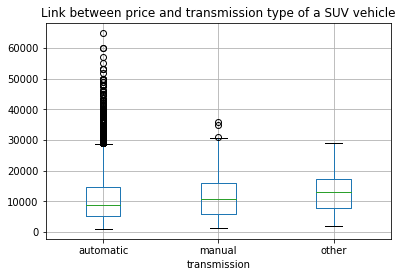

In [100]:
#Great! SUV variables' transmission categories have over 50 ads each
#Onto plotting
popular_type_suv.boxplot(by='transmission', column='price')
plt.suptitle('')
plt.title('Link between price and transmission type of a SUV vehicle');

Above we see the distribution of automatic, manual and other transmission types.
The price of other type of transmission is slightly more expensive. This can be explained by the fact that other transmission type vehicles are rare and hence more expensive.
We can conclude that transmission type impacts price.

In [101]:
#Now SUV paint color
popular_type_suv.paint_color.value_counts()

other     1927
black     1922
white     1707
silver    1364
grey      1059
blue       909
red        802
green      386
brown      319
custom     256
orange      74
yellow      41
purple      37
Name: paint_color, dtype: int64

In [102]:
#SUV variables' paint color categories must have over 50 ads each,
#otherwise, their parameters won't be valid for analysis, so we drop them
popular_type_suv=popular_type_suv[popular_type_suv['paint_color']!='yellow']
popular_type_suv=popular_type_suv[popular_type_suv['paint_color']!='purple']
popular_type_suv.reset_index(drop=True, inplace=True)
popular_type_suv.paint_color.value_counts()

other     1927
black     1922
white     1707
silver    1364
grey      1059
blue       909
red        802
green      386
brown      319
custom     256
orange      74
Name: paint_color, dtype: int64

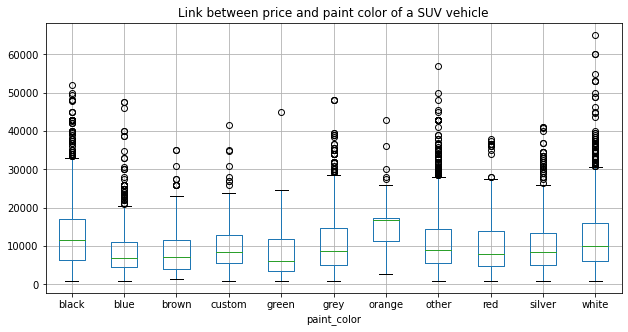

In [103]:
#Excellent! Now, SUV variables' paint color categories have over 50 ads each
#Onto plotting
popular_type_suv.boxplot(by='paint_color', column='price', figsize=(10,5))
plt.suptitle('')
plt.title('Link between price and paint color of a SUV vehicle');

Looking at the plot above we can conclude there is no direct correlation between vehicle paint color and it's price, we can assume that is a subjective preference of the individual. 

Now onto the quantical variables (age, mileage and condition) and scatterplots.

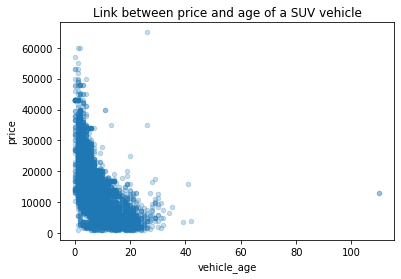

In [104]:
#SUV age scatterplot
popular_type_suv.plot.scatter(x='vehicle_age', y='price', alpha=.25)
plt.title('Link between price and age of a SUV vehicle');

Above we see that the older the vehicle the lower the price. This is reasonable. There is indeed a clear correlation between vehicle age and price.

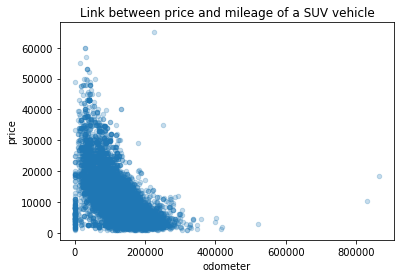

In [105]:
#SUV mileage scatterplot
popular_type_suv.plot.scatter(x='odometer', y='price', alpha=.25)
plt.title('Link between price and mileage of a SUV vehicle');

Above we see that the lower the mileage the higher the price. This is reasonable in real life since it indicates the car is newer less used and in better condition. There is indeed a clear correlation between mileage and price.

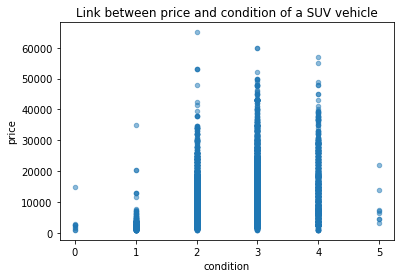

In [106]:
#SUV condition scatterplot
popular_type_suv.plot.scatter(x='condition', y='price', alpha=.50)
plt.title('Link between price and condition of a SUV vehicle');

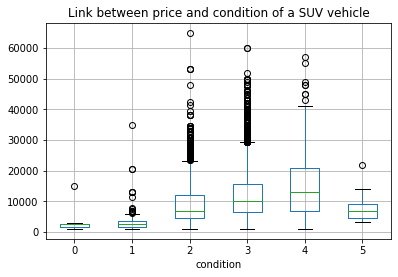

In [107]:
popular_type_suv.boxplot(by='condition', column='price')
plt.suptitle('')
plt.title('Link between price and condition of a SUV vehicle');

In [108]:
popular_type_suv.condition.value_counts()

3    5627
2    3877
4     949
1     255
0       9
5       8
Name: condition, dtype: int64

Above in the scatterplot we see that although condition does impact price there is no significant correlation.
For good condition (2) there is a wide range of prices given it a subjective condition description. Salvage condition (0) prices are lowest which makes sense. Other than that, the scatterplot isn't too clear and is even confusing, therefore, we also create a boxplot.
At first we saw no significant correlation but then the boxplot clearly showed that there is in fact a correlation between condition and price, the newer and better condition the car is in the higher the price and vice versa. Brand new condition vehicles (5) prices are lower than like new (4) and excellent (3), that may be due to low number of vehicles in this condition.

In conclusion, vehicle age, mileage and condition factors tremendously impact the vehicle's price, transmission also has an impact just not as significant and paint color is just a preference and therefore has no impact at all on the vehicle's price.

In [109]:
#Now, onto truck
#Step 1- subset
popular_type_truck = df_filtered[df_filtered['type'].isin(['truck'])]
popular_type_truck

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,day,vehicle_age,avg_miles_per_year
21,7500,2004,chevrolet silverado,4,8,gas,180000,automatic,truck,red,1,2019-01-05,64,2019,1,Saturday,15,12000
37,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,1,2019-03-31,1,2019,3,Sunday,10,23400
48,6200,2006,ford f-150,3,6,gas,69698,automatic,truck,custom,0,2018-05-03,50,2018,5,Thursday,12,5808
50,10400,2012,chevrolet colorado,3,5,gas,111871,automatic,truck,red,1,2019-01-30,27,2019,1,Wednesday,7,15981
57,13000,2005,ram 1500,2,8,gas,146000,automatic,truck,grey,1,2019-03-14,26,2019,3,Thursday,14,10428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,13900,2006,chevrolet silverado 1500,3,8,gas,152000,automatic,truck,other,1,2018-05-08,33,2018,5,Tuesday,12,12666
45139,21900,2008,chevrolet silverado 3500hd,3,8,diesel,203000,automatic,truck,white,1,2018-12-27,37,2018,12,Thursday,10,20300
45147,2995,2001,ford f150,2,8,gas,206257,automatic,truck,red,0,2018-12-02,12,2018,12,Sunday,17,12132
45148,15900,2011,gmc sierra 1500,3,8,gas,117500,automatic,truck,other,1,2019-01-25,69,2019,1,Friday,8,14687


In [110]:
#Looks good!
#Let's check whether each category for truck type has at least 50 ads.
#If so, we'll plot box-and-whisker charts for transmission type and color variables
#First transmission
popular_type_truck.transmission.value_counts()

automatic    10341
manual         401
other           86
Name: transmission, dtype: int64

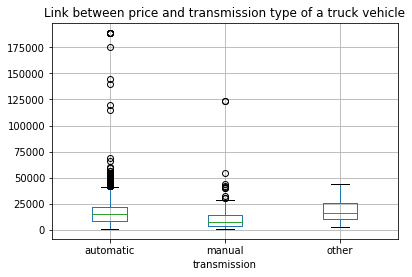

In [111]:
#Great! Truck variables' categories have over 50 ads each
#Onto plotting
popular_type_truck.boxplot(by='transmission', column='price')
plt.suptitle('')
plt.title('Link between price and transmission type of a truck vehicle');

Above we see the distribution of automatic, manual and other transmission types.
The price of other type of transmission is slightly more expensive. This can be explained by the fact that other transmission type vehicles are rare and hence more expensive.
We can conclude that transmission type impacts price.

In [112]:
#Now truck paint color
popular_type_truck.paint_color.value_counts()

white     3268
other     1876
black     1354
red        947
silver     906
grey       831
blue       769
custom     275
green      246
brown      231
yellow      63
orange      46
purple      16
Name: paint_color, dtype: int64

In [113]:
#Truck variables' paint color categories must have over 50 ads each,
#otherwise, their parameters won't be valid for analysis, so we drop them
popular_type_truck=popular_type_truck[popular_type_truck['paint_color']!='orange']
popular_type_truck=popular_type_truck[popular_type_truck['paint_color']!='purple']
popular_type_truck.reset_index(drop=True, inplace=True)
popular_type_truck.paint_color.value_counts()

white     3268
other     1876
black     1354
red        947
silver     906
grey       831
blue       769
custom     275
green      246
brown      231
yellow      63
Name: paint_color, dtype: int64

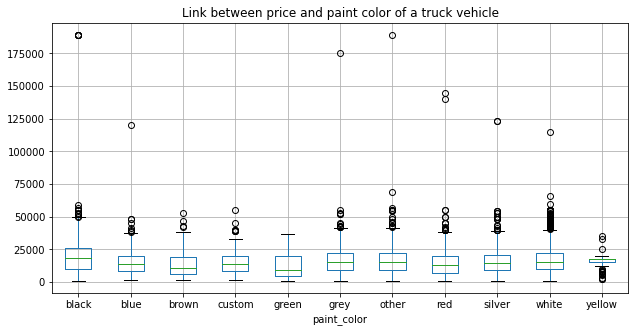

In [114]:
#Excellent! Now, truck variables' categories have over 50 ads each
#Onto plotting
popular_type_truck.boxplot(by='paint_color', column='price', figsize=(10,5))
plt.suptitle('')
plt.title('Link between price and paint color of a truck vehicle');

Looking at the plot above we can conclude there is no direct correlation between vehicle paint color and it's price, we can assume that is a subjective preference of the individual. 

Now onto the quantical variables (age, mileage and condition) and scatterplots.

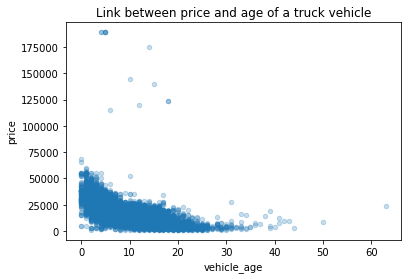

In [115]:
#Truck age scatterplot
popular_type_truck.plot.scatter(x='vehicle_age', y='price', alpha=.25)
plt.title('Link between price and age of a truck vehicle');

Above we see that the older the vehicle the lower the price. This is reasonable. There is indeed a clear correlation between vehicle age and price.

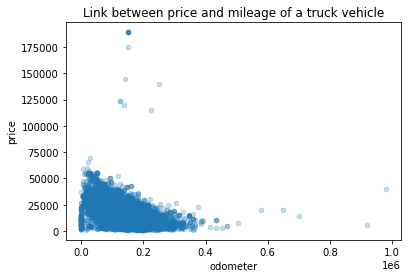

In [116]:
#Truck mileage scatterplot
popular_type_truck.plot.scatter(x='odometer', y='price', alpha=.25)
plt.title('Link between price and mileage of a truck vehicle');

Above we see that the lower the mileage the higher the price. This is reasonable in real life since it indicates the car is newer less used and in better condition. There is indeed a clear correlation between mileage and price.

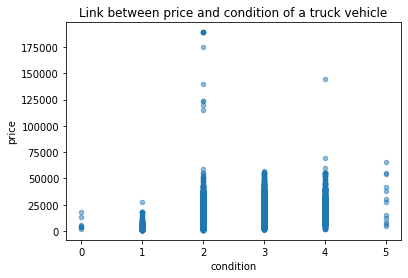

In [117]:
#Truck condition scatterplot
popular_type_truck.plot.scatter(x='condition', y='price', alpha=.50)
plt.title('Link between price and condition of a truck vehicle');

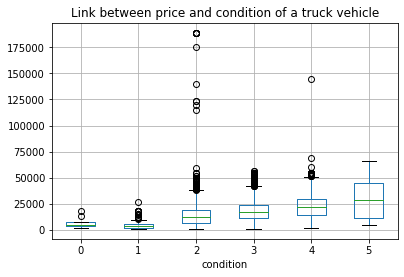

In [118]:
popular_type_truck.boxplot(by='condition', column='price')
plt.suptitle('')
plt.title('Link between price and condition of a truck vehicle');

In [119]:
popular_type_truck.condition.value_counts()

2    4885
3    4650
4     847
1     364
5      12
0       8
Name: condition, dtype: int64

Above in the scatterplot we see that although condition does impact price there is no significant correlation.
For good condition (2) there is a wide range of prices given it a subjective condition description. Salvage condition (0) prices are lowest which makes sense. Other than that, the scatterplot isn't too clear and is even confusing, therefore, we also create a boxplot.
At first we saw no significant correlation but then the boxplot clearly showed that there is in fact a correlation between condition and price, the newer and better condition the car is in the higher the price and vice versa. Brand new condition vehicles (5) prices are lower than like new (4) and excellent (3), that may be due to low number of vehicles in this condition.

In conclusion, vehicle age, mileage and condition factors tremendously impact the vehicle's price, transmission also has an impact just not as significant and paint color is just a preference and therefore has no impact at all on the vehicle's price.

All in all, SUV and truck vehicle types share similar impacts of the same factors on the vehicle prices.

## Overall conclusion

As analysts at Crankshaft List where hundreds of free advertisements for vehicles are published on our site every day, we have studied the data collected over the last few years in order to determine which factors influence the price of a vehicle.
In this project, we followed the methodology as following:

- Open the data file and study the general information.
- Data preprocessing including handling missing values and converting data to required types.
- Add calculations and necessary columns as required for the analysis.
- Carry exploratory data analysis following the project instruction.
- Final conclusion.

For each phase of the project we drew conclusions and finally here we provide an overall conclusion as following.

For the analysis of factors significantly influencing vehicle prices, we used only the most popular vehicle types (truck and SUV). Based on our analysis, these are the project's final conclusions:

- Generally, the older a vehicle is, the lower the price.
- Generally, the higher the mileage, the lower the price.
- Generally, the better the condition, the higher the price.
- Vehicles with 'other' transmission type are more expensive, generally.
- Color, being a subjective preference, revealed no significant correlation to price.